<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



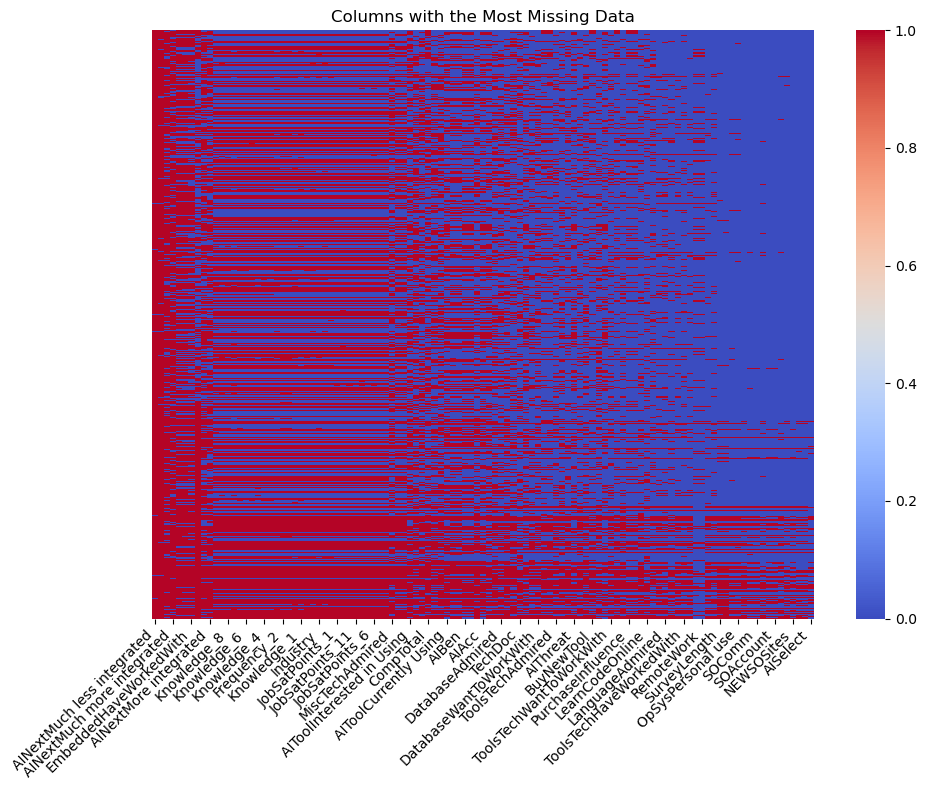

In [6]:
nan = df.columns[df.isnull().any()]
top_cols = df[nan].isnull().sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_cols].isnull(),
            cmap='coolwarm',
            yticklabels=False,
            cbar=True)
plt.title('Columns with the Most Missing Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [7]:
# using "AINextMuch less integrated" as employment has 0 missing values
missing = df['AINextMuch less integrated'].isnull().sum()

print(f"Number of missing rows for AINextMuch less integrated: {missing}")

Number of missing rows for AINextMuch less integrated: 64289


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [8]:
# using "AINextMuch less integrated" as employment has 0 missing values
most_frequent = df['AINextMuch less integrated'].mode()[0]

print(f"The most frequent value is: {most_frequent}")

The most frequent value is: Writing code


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [9]:
import numpy as np 

# using "AINextMuch less integrated" as employment has 0 missing values
mode = df['AINextMuch less integrated'].mode()[0]
df['AINextMuch less integrated'] = df['AINextMuch less integrated'].replace(np.nan, mode)

print(f"Number of missing values in AINextMuch less integrated column after imputations: {df['AINextMuch less integrated'].isnull().sum()}")

Number of missing values in AINextMuch less integrated column after imputations: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


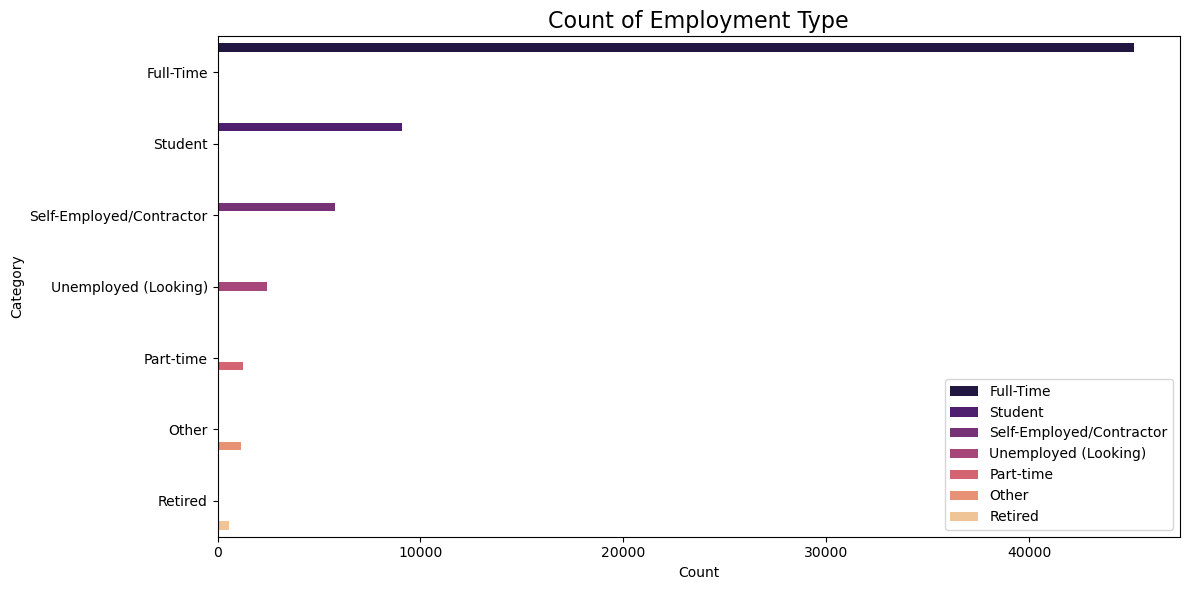

In [10]:
# clean the data
def clean_employment(text):
    if pd.isna(text):
        return "Unknown"

    text = text.lower()

    if 'employed, full-time' in text:
       return 'Full-Time'
    elif 'student' in text:
        return 'Student'
    elif 'independent contractor' in text or 'freelancer' in text:
        return 'Self-Employed/Contractor'
    elif 'not employed, but looking' in text:
        return 'Unemployed (Looking)'
    elif 'employed, part-time' in text:
        return 'Part-time'
    elif 'retired' in text:
        return 'Retired'
    else:
        return 'Other'

df['Employment'] = df['Employment'].apply(clean_employment)

group_counts = df['Employment'].value_counts() # create counts for visualisation

# create visualisation
plt.figure(figsize=(12, 6))
sns.barplot(
    x=group_counts.values,
    y=group_counts.index,
    hue=group_counts.index,
    palette='magma'
)

plt.title('Count of Employment Type', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
